---

19CSE304 - FODS
---

Final Assignment
---



---

- NAME: BALAJI V
- ROLL NO: CB.EN.U4CSE20211 


---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **PART A. Data Manipulation-Pandas**

# *QUESTION 1*

In [ ]:
s_abbrevs = pd.read_csv('/content/state-abbrevs.csv')
s_area = pd.read_csv('/content/state-areas.csv')
s_pop = pd.read_csv('/content/state-population.csv')

In [ ]:
s_abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
s_area.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [ ]:
s_pop.head()

,state/region,ages,population
year,,,
2012,AL,under18,1117489.0
2012,AL,total,4817528.0
2010,AL,under18,1130966.0
2010,AL,total,4785570.0
2011,AL,under18,1125763.0


In [ ]:
s_pop = s_pop.set_index('year')
s_pop.head()

,state/region,ages,population
year,,,
2012,AL,under18,1117489.0
2012,AL,total,4817528.0
2010,AL,under18,1130966.0
2010,AL,total,4785570.0
2011,AL,under18,1125763.0


In [ ]:
s_pop.isnull().any()

state/region    False
ages            False
population       True
dtype: bool

In [ ]:
s_pop = s_pop.fillna(method='ffill')
s_pop.isnull().any()

state/region    False
ages            False
population      False
dtype: bool

In [ ]:
s_pop = s_pop.reset_index()
data = pd.concat([s_area, s_abbrevs, s_pop], axis=1, join='inner')
data.head()

,state,area (sq. mi),state,abbreviation,year,state/region,ages,population
0,Alabama,52423,Alabama,AL,2012,AL,under18,1117489.0
1,Alaska,656425,Alaska,AK,2012,AL,total,4817528.0
2,Arizona,114006,Arizona,AZ,2010,AL,under18,1130966.0
3,Arkansas,53182,Arkansas,AR,2010,AL,total,4785570.0
4,California,163707,California,CA,2011,AL,under18,1125763.0


In [ ]:
sample_data = data.sample(10)
sample_data

,state,area (sq. mi),state,abbreviation,year,state/region,ages,population
47,West Virginia,24231,Washington,WA,1990,AL,total,4050055.0
28,New Hampshire,9351,North Dakota,ND,2000,AL,total,4452173.0
34,Ohio,44828,Michigan,MI,1996,AL,total,4331103.0
40,South Dakota,77121,South Carolina,SC,1993,AL,under18,1085606.0
18,Maine,35387,Louisiana,LA,2004,AL,total,4530729.0
22,Minnesota,86943,Nevada,NV,2001,AL,total,4467634.0
13,Indiana,36420,Illinois,IL,2008,AL,under18,1134927.0
38,Rhode Island,1545,Pennsylvania,PA,1994,AL,total,4260229.0
48,Wisconsin,65503,West Virginia,WV,1990,AK,total,553290.0
26,Nebraska,77358,New York,NY,1999,AL,under18,1121287.0


In [ ]:
data = data.append(sample_data, ignore_index=True)
data.tail()   

,state,area (sq. mi),state,abbreviation,year,state/region,ages,population
56,Minnesota,86943,Nevada,NV,2001,AL,total,4467634.0
57,Indiana,36420,Illinois,IL,2008,AL,under18,1134927.0
58,Rhode Island,1545,Pennsylvania,PA,1994,AL,total,4260229.0
59,Wisconsin,65503,West Virginia,WV,1990,AK,total,553290.0
60,Nebraska,77358,New York,NY,1999,AL,under18,1121287.0


In [ ]:
data2 = pd.merge(s_area, s_abbrevs, how='outer', on='state')
data2.head()

,state,area (sq. mi),abbreviation
0,Alabama,52423,AL
1,Alaska,656425,AK
2,Arizona,114006,AZ
3,Arkansas,53182,AR
4,California,163707,CA


In [ ]:
data3 = s_area.join(s_abbrevs, how='inner', lsuffix='_left', rsuffix='_right')
data3.head()

,state_left,area (sq. mi),state_right,abbreviation
0,Alabama,52423,Alabama,AL
1,Alaska,656425,Alaska,AK
2,Arizona,114006,Arizona,AZ
3,Arkansas,53182,Arkansas,AR
4,California,163707,California,CA


In [ ]:
s_pop = s_pop.rename(columns={'state/region':'abbreviation'})
s_pop.head()

,year,abbreviation,ages,population
0,2012,AL,under18,1117489.0
1,2012,AL,total,4817528.0
2,2010,AL,under18,1130966.0
3,2010,AL,total,4785570.0
4,2011,AL,under18,1125763.0


In [ ]:
data2 = pd.merge(data2, state_pop, how='outer', on='abbreviation')
data2.head()

,state,area (sq. mi),abbreviation,year,ages,population
0,Alabama,52423.0,AL,2012.0,under18,1117489.0
1,Alabama,52423.0,AL,2012.0,total,4817528.0
2,Alabama,52423.0,AL,2010.0,under18,1130966.0
3,Alabama,52423.0,AL,2010.0,total,4785570.0
4,Alabama,52423.0,AL,2011.0,under18,1125763.0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2545 entries, 0 to 2544
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          2449 non-null   object 
 1   area (sq. mi)  2449 non-null   float64
 2   abbreviation   2544 non-null   object 
 3   year           2544 non-null   float64
 4   ages           2544 non-null   object 
 5   population     2544 non-null   float64
dtypes: float64(3), object(3)
memory usage: 139.2+ KB


In [ ]:
data2.groupby('abbreviation').agg({'population':'sum'}).head()
data2.groupby('abbreviation').agg({'population':'mean'}).head() 

,population
abbreviation,
AK,4.164389e+05
AL,2.797862e+06
AR,1.686640e+06
AZ,3.337577e+06
CA,2.170908e+07


In [ ]:
data2.groupby('abbreviation').agg({'area (sq. mi)':'mean'}).head()

,area (sq. mi)
abbreviation,
AK,656425.0
AL,52423.0
AR,53182.0
AZ,114006.0
CA,163707.0


In [ ]:
def min_max(row):
    data = row[['population']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})
data2.apply(min_max, axis='columns').head()

,min,max
0,1117489.0,1117489.0
1,4817528.0,4817528.0
2,1130966.0,1130966.0
3,4785570.0,4785570.0
4,1125763.0,1125763.0


In [ ]:
data2.pivot_table('population', index='abbreviation', columns='year', aggfunc='sum').head()


year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0
abbreviation,,,,,,,,,,,,,,,,,,,,,
AK,730792.0,752373.0,773614.0,786624.0,790747.0,789402.0,793929.0,801248.0,812569.0,816201.0,...,845621.0,852250.0,860882.0,864644.0,870579.0,885246.0,901770.0,911704.0,918469.0,923264.0
AL,5100096.0,5159950.0,5226887.0,5299808.0,5357409.0,5407353.0,5443195.0,5490828.0,5522953.0,5551428.0,...,5644391.0,5687034.0,5755779.0,5805136.0,5853133.0,5892130.0,5916536.0,5927390.0,5935017.0,5945203.0
AR,2977519.0,3009356.0,3054253.0,3099777.0,3147861.0,3203070.0,3250021.0,3281294.0,3309926.0,3333800.0,...,3432852.0,3470884.0,3519603.0,3551387.0,3580279.0,3604729.0,3634227.0,3649082.0,3660299.0,3669239.0
AZ,4690137.0,4816861.0,4971312.0,5159673.0,5364946.0,5605890.0,5802225.0,5974149.0,6169136.0,6356219.0,...,7136858.0,7368245.0,7604008.0,7775576.0,7909013.0,7970497.0,8037353.0,8085149.0,8168298.0,8243438.0
CA,37940016.0,38716341.0,39414306.0,39899738.0,40274493.0,40617160.0,41098353.0,41621369.0,42150913.0,42707082.0,...,44993073.0,45233508.0,45392086.0,45585931.0,45925958.0,46255730.0,46617695.0,46921017.0,47208885.0,47507398.0


# **PART B. Time Series**

# *QUESTION 2*

In [ ]:
bicycle_data = pd.read_csv('seattle_bicycle_data_fremont.csv')
bicycle_data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03T00:00:00.000,13.0,4.0,9.0
1,2012-10-03T01:00:00.000,10.0,4.0,6.0
2,2012-10-03T02:00:00.000,2.0,1.0,1.0
3,2012-10-03T03:00:00.000,5.0,2.0,3.0
4,2012-10-03T04:00:00.000,7.0,6.0,1.0


In [ ]:
#index by time 
bicycle_data.index = pd.to_datetime(bicycle_data['Date'])
bicycle_data.head()

#drop date column
bicycle_data.drop('Date', axis=1, inplace=True)
bicycle_data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [ ]:
#resample data by week
bicycle_data_weekly = bicycle_data.resample('W').sum()
bicycle_data_weekly.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,14292.0,7297.0,6995.0
2012-10-14,16795.0,8679.0,8116.0
2012-10-21,15509.0,7946.0,7563.0
2012-10-28,13437.0,6901.0,6536.0
2012-11-04,12194.0,6408.0,5786.0


In [ ]:
#resample data by month
bicycle_data_monthly = bicycle_data.resample('M').sum()
bicycle_data_monthly.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,65695.0,33764.0,31931.0
2012-11-30,50647.0,26062.0,24585.0
2012-12-31,36369.0,18608.0,17761.0
2013-01-31,44884.0,22910.0,21974.0
2013-02-28,50027.0,25898.0,24129.0


In [ ]:
#resample data by year
bicycle_data_yearly = bicycle_data.resample('Y').sum()
bicycle_data_yearly.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-12-31,152711.0,78434.0,74277.0
2013-12-31,928279.0,478991.0,449288.0
2014-12-31,1006196.0,515326.0,490870.0
2015-12-31,986556.0,500915.0,485641.0
2016-12-31,982470.0,468304.0,514166.0


In [ ]:
#shift data by 1 year
bicycle_data_yearly_shift = bicycle_data_yearly.shift(1)
bicycle_data_yearly_shift.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-12-31,NaN,NaN,NaN
2013-12-31,152711.0,78434.0,74277.0
2014-12-31,928279.0,478991.0,449288.0
2015-12-31,1006196.0,515326.0,490870.0
2016-12-31,986556.0,500915.0,485641.0


In [ ]:
#shift data by 1 month
bicycle_data_monthly_shift = bicycle_data_monthly.shift(1)
bicycle_data_monthly_shift.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,NaN,NaN,NaN
2012-11-30,65695.0,33764.0,31931.0
2012-12-31,50647.0,26062.0,24585.0
2013-01-31,36369.0,18608.0,17761.0
2013-02-28,44884.0,22910.0,21974.0


In [ ]:
#windowing data
bicycle_data_rolling = bicycle_data.rolling(window=30).mean()
bicycle_data_rolling

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,NaN,NaN,NaN
...,...,...,...
2019-10-31 19:00:00,194.033333,59.833333,134.200000
2019-10-31 20:00:00,191.866667,58.900000,132.966667
2019-10-31 21:00:00,186.500000,57.166667,129.333333


In [ ]:
#rolling windows
rolling = bicycle_data.rolling(365, center=True)
rolling

Rolling [window=365,center=True,axis=0,method=single]

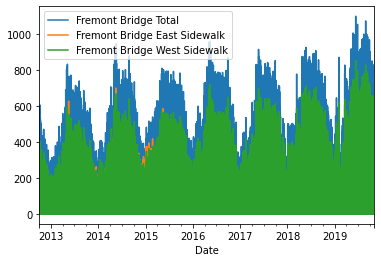

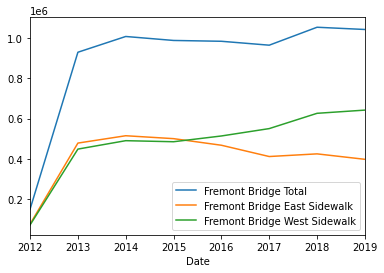

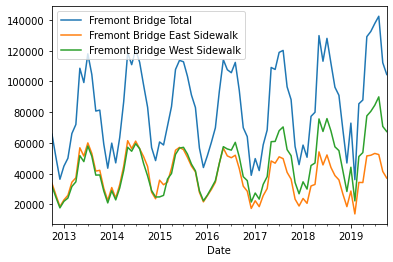

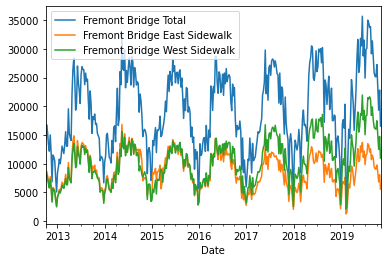

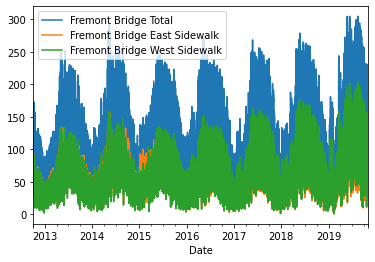

In [ ]:
#Visualize the data
#plot data
bicycle_data.plot()
plt.show()


#plot data by year
bicycle_data_yearly.plot()
plt.show()


#plot data by month
bicycle_data_monthly.plot()
plt.show()


#plot data by week
bicycle_data_weekly.plot()
plt.show()


#plot data by rolling
bicycle_data_rolling.plot()
plt.show()

# *QUESTION 3*

In [ ]:
stock_data = pd.read_csv("https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/stock_px_2.csv")
stock_data.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [ ]:
stock_data.columns  

Index(['Unnamed: 0', 'AAPL', 'MSFT', 'XOM', 'SPX'], dtype='object')

In [ ]:
#rename columns
stock_data.columns = ['Date', 'AAPL', 'MSFT', 'XOM', 'SPX']
stock_data.head()

,Date,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [ ]:
#index by time
stock_data.index = pd.to_datetime(stock_data['Date'])
stock_data.head()

,Date,AAPL,MSFT,XOM,SPX
Date,,,,,
2003-01-02,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [ ]:
#select data by date
stock_data.loc['2011-01-04':'2011-01-07']

,Date,AAPL,MSFT,XOM,SPX
Date,,,,,
2011-01-04,2011-01-04 00:00:00,331.29,27.57,73.60,1270.20
2011-01-05,2011-01-05 00:00:00,334.00,27.48,73.40,1276.56
2011-01-06,2011-01-06 00:00:00,333.73,28.29,73.88,1273.85
2011-01-07,2011-01-07 00:00:00,336.12,28.07,74.28,1271.50


In [ ]:
#subset data
stock_data[['AAPL', 'MSFT']].sample(5)

,AAPL,MSFT
Date,,
2007-12-18,182.98,32.04
2007-08-24,135.30,26.49
2007-12-03,178.86,30.36
2003-08-21,10.84,20.69
2007-03-22,93.96,25.82


In [ ]:
#date range
stock_data['2011-01-04':'2011-01-07']

,Date,AAPL,MSFT,XOM,SPX
Date,,,,,
2011-01-04,2011-01-04 00:00:00,331.29,27.57,73.60,1270.20
2011-01-05,2011-01-05 00:00:00,334.00,27.48,73.40,1276.56
2011-01-06,2011-01-06 00:00:00,333.73,28.29,73.88,1273.85
2011-01-07,2011-01-07 00:00:00,336.12,28.07,74.28,1271.50


In [ ]:
#frequency
stock_data['2011-01-04':'2011-01-07'].resample('M').mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2011-01-31,333.785,27.8525,73.79,1273.0275


In [ ]:
#Shifting
temp_df = stock_data.shift(100)
temp_df

,Date,AAPL,MSFT,XOM,SPX
Date,,,,,
2003-01-02,NaN,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2011-10-10,2011-05-18 00:00:00,339.87,24.54,81.20,1340.68
2011-10-11,2011-05-19 00:00:00,340.53,24.56,81.79,1343.60
2011-10-12,2011-05-20 00:00:00,335.22,24.34,81.03,1333.27


In [ ]:
temp_df = stock_data.shift(-200)
temp_df

,Date,AAPL,MSFT,XOM,SPX
Date,,,,,
2003-01-02,2003-10-17 00:00:00,11.38,22.94,32.51,1039.32
2003-01-03,2003-10-20 00:00:00,11.61,23.27,32.48,1044.68
2003-01-06,2003-10-21 00:00:00,11.59,23.27,32.25,1046.03
2003-01-07,2003-10-22 00:00:00,11.38,22.90,31.41,1030.36
2003-01-08,2003-10-23 00:00:00,11.49,22.92,31.62,1033.77
...,...,...,...,...,...
2011-10-10,NaN,NaN,NaN,NaN,NaN
2011-10-11,NaN,NaN,NaN,NaN,NaN
2011-10-12,NaN,NaN,NaN,NaN,NaN


In [ ]:
#time zone localization
stock_data.tz_localize('UTC')
stock_data.head()

,Date,AAPL,MSFT,XOM,SPX
Date,,,,,
2003-01-02,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [ ]:
#time zone conversion
sample = stock_data.sample(10)
sample.tz_localize('Europe/London').tz_convert('Europe/London')
sample

,Date,AAPL,MSFT,XOM,SPX
Date,,,,,
2005-08-31,2005-08-31 00:00:00,46.89,24.49,52.73,1220.33
2008-05-01,2008-05-01 00:00:00,180.00,27.22,82.61,1409.34
2008-12-12,2008-12-12 00:00:00,98.27,18.19,75.23,879.73
2009-04-13,2009-04-13 00:00:00,120.22,18.53,63.93,858.73
2003-10-01,2003-10-01 00:00:00,10.40,22.48,31.41,1018.22
2003-09-17,2003-09-17 00:00:00,11.06,22.47,30.98,1025.97
2011-10-13,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66
2008-09-19,2008-09-19 00:00:00,140.91,23.48,74.02,1255.08
2007-07-31,2007-07-31 00:00:00,131.76,26.56,77.45,1455.27


In [ ]:
#period arithmetic
sample = stock_data.sample(10)
sample.index = sample.index.to_period('M')
sample.head()

,Date,AAPL,MSFT,XOM,SPX
Date,,,,,
2003-11,2003-11-19 00:00:00,10.21,20.10,30.01,1042.44
2003-12,2003-12-12 00:00:00,10.44,21.13,32.23,1074.14
2003-09,2003-09-16 00:00:00,11.18,22.78,31.71,1029.32
2006-01,2006-01-13 00:00:00,85.59,24.39,53.95,1287.61
2006-09,2006-09-05 00:00:00,71.48,23.23,61.51,1313.25


In [ ]:
#resampling and frequency conversions
aapl = stock_data['AAPL']
msft = stock_data['MSFT']
xom = stock_data['XOM']
spx = stock_data['SPX']

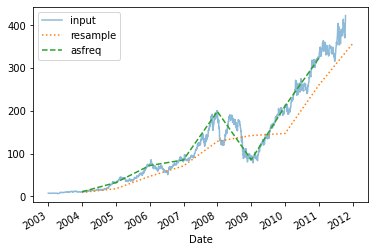

In [ ]:
aapl.plot(alpha=0.5, style='-')
aapl.resample('BA').mean().plot(style=':')
aapl.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')

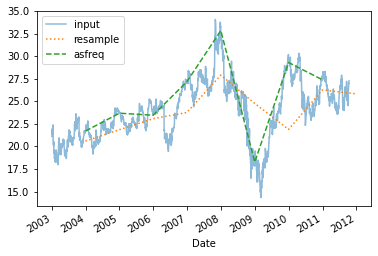

In [ ]:
msft.plot(alpha=0.5, style='-')
msft.resample('BA').mean().plot(style=':')
msft.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')

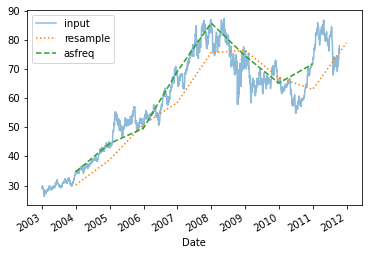

In [ ]:
xom.plot(alpha=0.5, style='-')
xom.resample('BA').mean().plot(style=':')
xom.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')

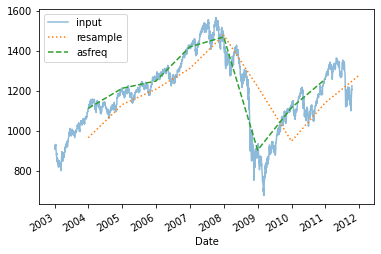

In [ ]:
spx.plot(alpha=0.5, style='-')
spx.resample('BA').mean().plot(style=':')
spx.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')

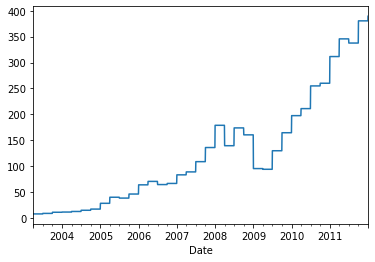

In [ ]:
#downsampling
stock_data['AAPL'].resample('Q-DEC').mean().asfreq('D', method='ffill').plot()
plt.show()

In [ ]:
#moving window functions
aapl = stock_data['AAPL']
aapl.head()

Date
2003-01-02    7.40
2003-01-03    7.45
2003-01-06    7.45
2003-01-07    7.43
2003-01-08    7.28
Name: AAPL, dtype: float64

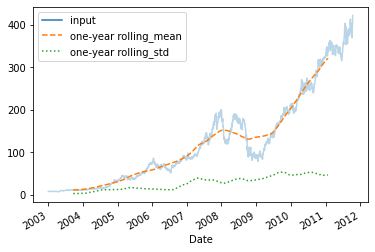

In [ ]:
rolling = aapl.rolling(365, center=True)

data = pd.DataFrame({'input': aapl,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

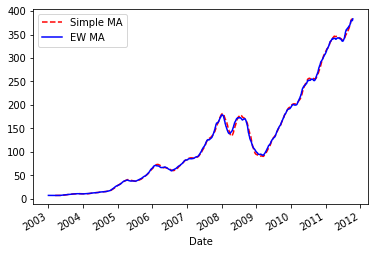

In [ ]:
#exponentially weighted functions
ma60 = aapl.rolling(60, min_periods=50).mean()
ewma60 = aapl.ewm(span=60).mean()
ma60.plot(style='r--', label='Simple MA')
ewma60.plot(style='b-', label='EW MA')
plt.legend()

# **C. Classifier**

# *Q4*

In [ ]:
q4DataFrame = pd.read_csv("ckd.csv")
q4DataFrame

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


In [ ]:
q4DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [ ]:
q4DataFrame.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

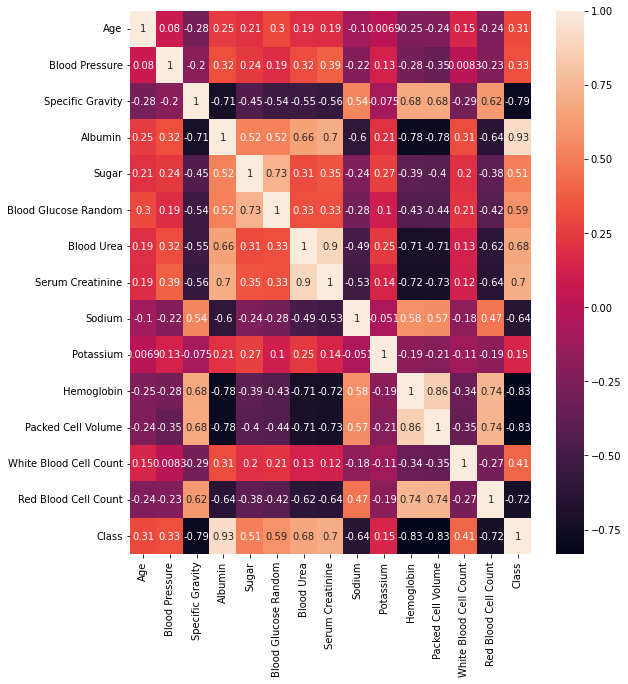

In [ ]:
plt.figure(figsize=(9,10))
sns.heatmap(q4DataFrame.corr(), annot=True)

In [ ]:
q4DataFrame[['Hemoglobin','Blood Glucose Random','Class']]

,Hemoglobin,Blood Glucose Random,Class
0,11.2,117,1
1,9.5,70,1
2,10.8,380,1
3,5.6,157,1
4,7.7,173,1
...,...,...,...
153,15.7,140,0
154,16.5,75,0
155,15.8,100,0
156,14.2,114,0


In [ ]:
X = q4DataFrame[['Hemoglobin','Blood Glucose Random']]
y = q4DataFrame[['Class']]

In [ ]:
X.describe()

,Hemoglobin,Blood Glucose Random
count,158.000000,158.000000
mean,13.687342,131.341772
std,2.882204,64.939832
min,3.100000,70.000000
25%,12.600000,97.000000
50%,14.250000,115.500000
75%,15.775000,131.750000
max,17.800000,490.000000


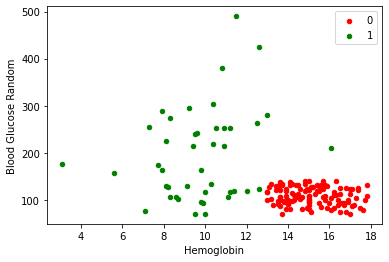

In [ ]:
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = q4DataFrame.groupby('Class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Hemoglobin', y='Blood Glucose Random', label=key, color=colors[key])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Train Data: ",X_train.shape, y_train.shape)
print("Test Data: ",X_test.shape, y_test.shape)

Train Data:  (126, 2) (126, 1)
Test Data:  (32, 2) (32, 1)


In [ ]:
q4_test = pd.DataFrame(X_train.copy())
q4_test['Class'] = y_train

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_predknn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predknn)
accuracy_score(y_test, y_predknn)

0.84375

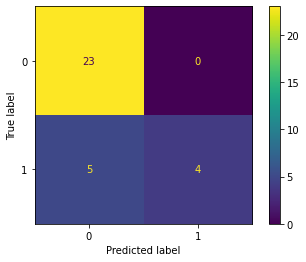

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.44      0.62         9

    accuracy                           0.84        32
   macro avg       0.91      0.72      0.76        32
weighted avg       0.87      0.84      0.82        32



In [ ]:
gls_std = X['Blood Glucose Random'].std()
gls_avg = X['Blood Glucose Random'].mean()
print(gls_avg,gls_std)

alice = np.array([[0,1.1*gls_std+gls_avg]])
alice

131.34177215189874 64.93983223609538


array([[  0.        , 202.77558761]])

In [ ]:
#is Alice likely to have CKD? print yes or no
prediction = knn.predict(alice)
if prediction == 1:
    print('Alice is likely to have CKD')
else:
    print('Alice is not likely to have CKD')

Alice is likely to have CKD


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


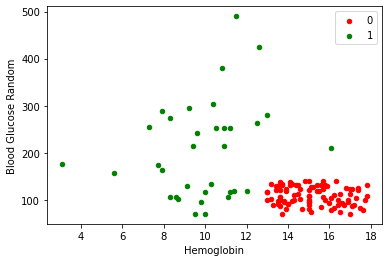

In [ ]:
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = q4_test.groupby('Class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Hemoglobin', y='Blood Glucose Random', label=key, color=colors[key])
# plt.scatter(x=0, y=1.1, color = 'g')
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 42)
svm.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [ ]:
y_predsvm = svm.predict(X_test)
cm1 = confusion_matrix(y_test, y_predsvm)
accuracy_score(y_test, y_predsvm)

0.96875

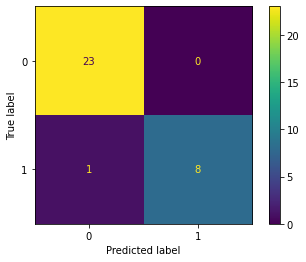

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1)
cm_display.plot()
plt.show()

In [ ]:
#is Alice likely to have CKD? print yes or no
prediction = svm.predict(alice)
if prediction == 1:
    print('Alice is likely to have CKD')
else:
    print('Alice is not likely to have CKD')

Alice is likely to have CKD


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predlr = lr.predict(X_test)
cm2 = confusion_matrix(y_test, y_predlr)
accuracy_score(y_test, y_predlr)

0.96875

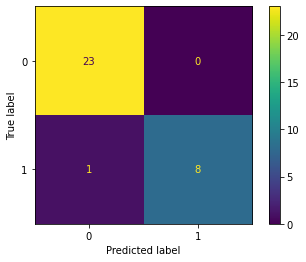

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2)
cm_display.plot()
plt.show()

In [ ]:
#is Alice likely to have CKD? print yes or no
prediction = lr.predict(alice)
if prediction == 1:
    print('Alice is likely to have CKD')
else:
    print('Alice is not likely to have CKD')

Alice is likely to have CKD


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# *Q5*

In [ ]:
q5DataFrame = pd.read_csv('wine.csv')
q5DataFrame

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
q5DataFrame.isnull().sum()

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of diulted wines    0
Proline                         0
dtype: int64

In [ ]:
q5DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diulted wines  178 non-null    float64
 13  Proli

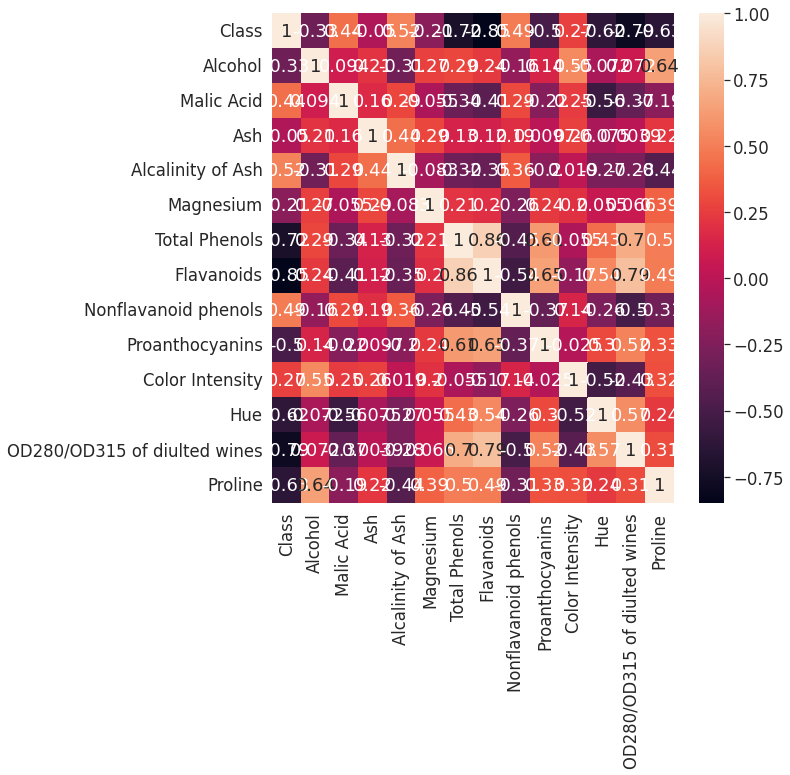

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(q5DataFrame.corr(), annot=True)

In [ ]:
XX = q5DataFrame.drop(['Class'], axis=1)
yy = q5DataFrame['Class']

In [ ]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2)

print(XX_train.shape)
print(XX_test.shape)

(142, 13)
(36, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(XX_train)

XX_train = sc.transform(XX_train)
XX_test = sc.transform(XX_test)

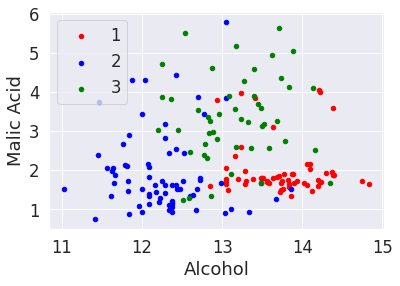

In [ ]:
colors = {1:'red', 2:'blue', 3:'green'}
fig, ax = plt.subplots()
grouped = q5DataFrame.groupby('Class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Alcohol', y='Malic Acid', label=key, color=colors[key])
plt.show()

**KNN**

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(XX_train, yy_train)

KNeighborsClassifier()

In [ ]:
yy_predknn = knn1.predict(XX_test)
cm3 = confusion_matrix(yy_test, yy_predknn)
accuracy_score(yy_test, yy_predknn)

1.0

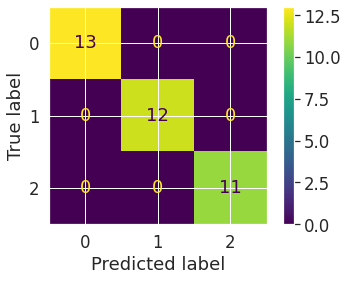

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3)
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(yy_test, yy_predknn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



**SVM**

In [ ]:
svm1 = SVC(kernel = 'linear', random_state = 42)
svm1.fit(XX_train, yy_train)

SVC(kernel='linear', random_state=42)

In [ ]:
yy_predsvm1 = svm1.predict(XX_test)
cm4 = confusion_matrix(yy_test, yy_predsvm1)
accuracy_score(yy_test, yy_predsvm1)

0.9444444444444444

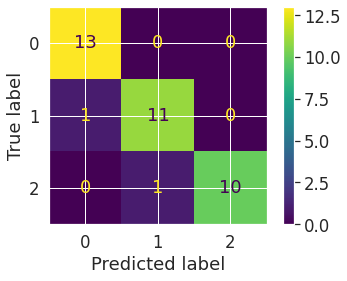

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm4)
cm_display.plot()
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(XX_train, yy_train)

yy_pred = gnb.predict(XX_test)

print(accuracy_score(yy_test, yy_pred))
print(confusion_matrix(yy_test, yy_pred))

0.9444444444444444
[[13  0  0]
 [ 1 10  1]
 [ 0  0 11]]


# **D. Regression**

# *Q7*

In [ ]:
houseDataFrame = pd.read_csv('housing.csv')
houseDataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
houseDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
houseDataFrame.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
mean = houseDataFrame['total_bedrooms'].mean()
print(mean)
houseDataFrame.fillna(mean, inplace=True)

537.8705525375618


In [ ]:
houseDataFrame.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
houseDataFrame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


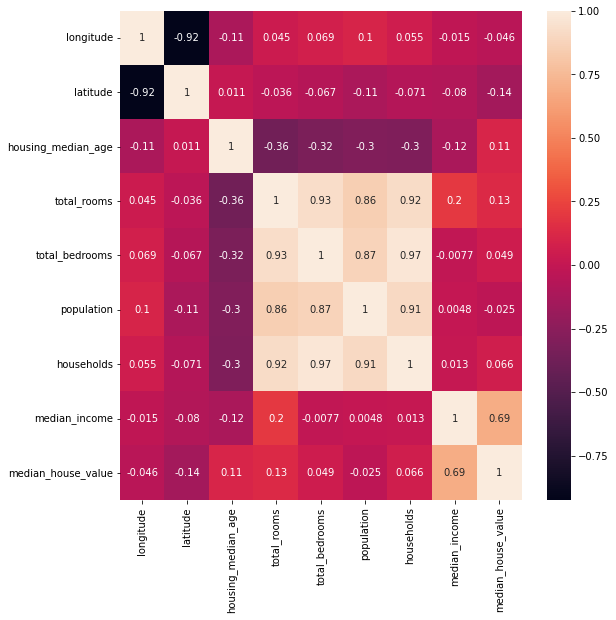

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(houseDataFrame.corr(), annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


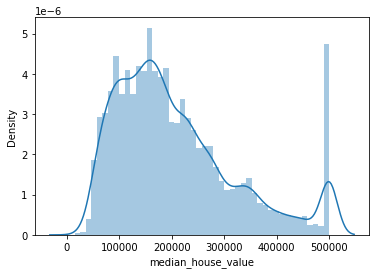

In [ ]:
sns.distplot(houseDataFrame['median_house_value'])

In [ ]:
houseDataFrame.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
x = houseDataFrame.drop(['median_house_value'], axis=1)
display(x)
Y = houseDataFrame.iloc[:,8:9]
display(Y)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
x['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
x['ocean_proximity'] = enc.fit_transform(x[['ocean_proximity']])
x['ocean_proximity'].unique()

array([3., 0., 1., 4., 2.])

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

In [ ]:
print("Train Data: ",x_train.shape, Y_train.shape)
print("Test Data: ",x_test.shape, Y_test.shape)

Train Data:  (14448, 9) (14448, 1)
Test Data:  (6192, 9) (6192, 1)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(x_train, Y_train)

LinearRegression()

In [ ]:
rfe = RFE(lm, n_features_to_select= 6)
rfe = rfe.fit(x_train, Y_train)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('longitude', True, 1),
 ('latitude', True, 1),
 ('housing_median_age', True, 1),
 ('total_rooms', False, 4),
 ('total_bedrooms', True, 1),
 ('population', False, 3),
 ('households', False, 2),
 ('median_income', True, 1),
 ('ocean_proximity', True, 1)]

In [ ]:
sel = x_train.columns[rfe.support_]
sel

Index(['longitude', 'latitude', 'housing_median_age', 'total_bedrooms',
       'median_income', 'ocean_proximity'],
      dtype='object')

In [ ]:
x_train.columns[~rfe.support_]

Index(['total_rooms', 'population', 'households'], dtype='object')

In [ ]:
x_train_rfe = x_train[sel]
x_train_rfe

,longitude,latitude,housing_median_age,total_bedrooms,median_income,ocean_proximity
1989,-119.79,36.73,52.0,28.000000,1.9750,1.0
256,-122.21,37.77,43.0,328.000000,2.2604,3.0
7887,-118.04,33.87,17.0,396.000000,6.2990,0.0
4581,-118.28,34.06,17.0,1196.000000,1.7199,0.0
1993,-119.81,36.73,50.0,194.000000,2.2206,1.0
...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,229.000000,4.4125,1.0
19648,-120.89,37.48,27.0,195.000000,2.9135,1.0
9845,-121.90,36.58,31.0,537.870553,3.1977,4.0
10799,-117.93,33.62,34.0,498.000000,5.6315,0.0


Multiple Linear Regression Model

In [ ]:
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [ ]:
lm = sm.OLS(Y_train, x_train_rfe).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3732.
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:14:05   Log-Likelihood:            -1.8214e+05
No. Observations:               14448   AIC:                         3.643e+05
Df Residuals:                   14441   BIC:                         3.643e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.637e+06   7.85

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regressor = LinearRegression()
regressor.fit(x_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(x_test)
r2_score(Y_test, Y_pred)

0.6284739590214079

C:\Users\Mukuntan\AppData\Local\Temp\ipykernel_11892\2816991260.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test - Y_pred), bins = 20)


Text(0.5, 0, 'Errors')

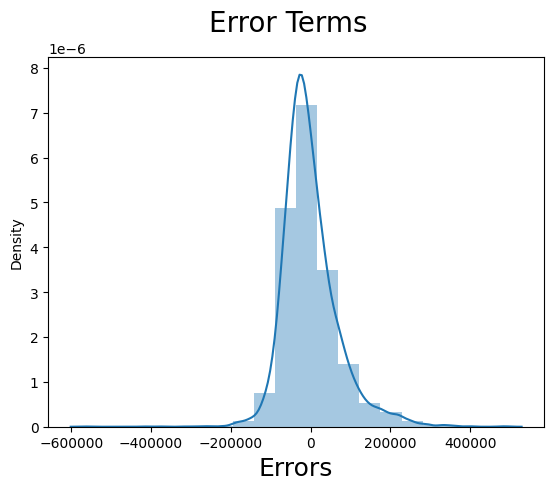

In [ ]:
diff = (Y_pred - Y_test)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_test - Y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

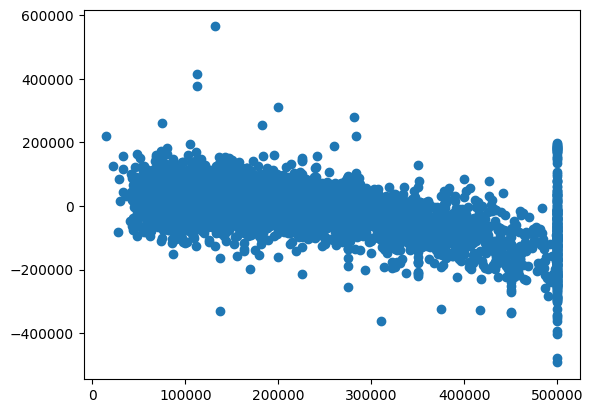

In [ ]:
plt.scatter(Y_test,diff)
plt.show()

In [ ]:
sc1 = StandardScaler()
sc1.fit(x_train)

x_train = sc1.transform(x_train)
x_test = sc1.transform(x_test)

**KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=7)
knnreg.fit(x_train,Y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
Y_predknn = knnreg.predict(x_test)
r2_score(Y_test, Y_predknn)

0.7122146572164423

In [ ]:
house_pred1 = pd.DataFrame(Y_test.copy())
house_pred1['Y_pred'] = Y_predknn
house_pred1.rename(columns={'median_house_value':'Y_test'}, inplace=True)
house_pred1

,Y_test,Y_pred
14740,136900.0,131085.714286
10101,241300.0,296257.142857
20566,200700.0,138014.285714
2670,72500.0,74342.857143
15709,460000.0,242842.857143
...,...,...
19681,74000.0,105557.142857
12156,177300.0,210842.857143
10211,351900.0,468286.428571
2445,92500.0,88100.000000


<AxesSubplot: xlabel='Y_test', ylabel='Y_pred'>

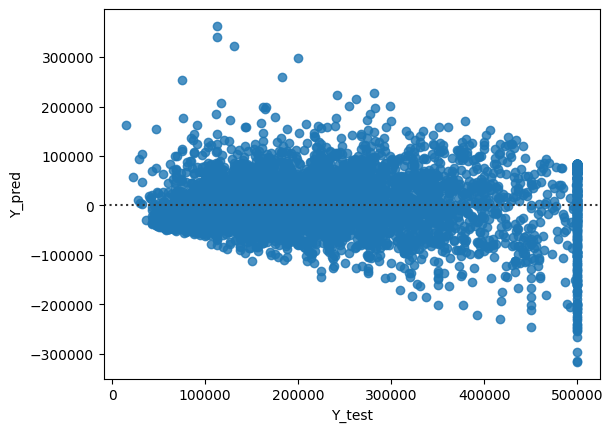

In [ ]:
sns.residplot(x='Y_test', y='Y_pred', data = house_pred1)

# *Q8*

In [ ]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

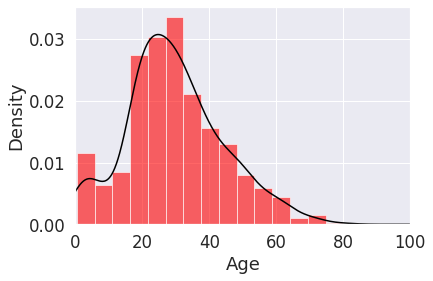

In [ ]:
titanic["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
titanic["Age"].plot(kind='density', color='black')
ax.set(xlabel='Age')
plt.xlim(0,100)
plt.xlabel("Age")
plt.show()

In [ ]:
print('Percent of missing Age records is %.2f%%' %((titanic['Age'].isnull().sum()/titanic.shape[0])*100))
print('Percent of missing Age records is %.2f%%' %((titanic['Cabin'].isnull().sum()/titanic.shape[0])*100))
print('Percent of missing Age records is %.2f%%' %((titanic['Embarked'].isnull().sum()/titanic.shape[0])*100))

Percent of missing Age records is 19.87%
Percent of missing Age records is 77.10%
Percent of missing Age records is 0.22%


In [ ]:
print('The most common boarding port of embarkation is %s.' %titanic['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [ ]:
titanic1 = titanic.copy()
titanic1["Age"].fillna(titanic["Age"].median(skipna=True), inplace=True)
titanic1["Embarked"].fillna(titanic['Embarked'].value_counts().idxmax(), inplace=True)
titanic1.drop('Cabin', axis=1, inplace=True)
titanic1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

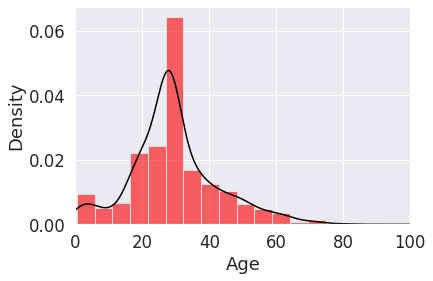

In [ ]:
titanic1["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
titanic1["Age"].plot(kind='density', color='black')
ax.set(xlabel='Age')
plt.xlim(0,100)
plt.xlabel("Age")
plt.show()

In [ ]:
titanic1['TravelAlone']=np.where((titanic1["SibSp"]+titanic1["Parch"])>0, 0, 1)
titanic1.drop('SibSp', axis=1, inplace=True)
titanic1.drop('Parch', axis=1, inplace=True)
titanic1

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,1


In [ ]:
titanic1=pd.get_dummies(titanic1, columns=["Pclass","Embarked","Sex"])
titanic1.drop('Sex_female', axis=1, inplace=True)
titanic1.drop('PassengerId', axis=1, inplace=True)
titanic1.drop('Name', axis=1, inplace=True)
titanic1.drop('Ticket', axis=1, inplace=True)
titanic1

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,0,1,1
887,1,19.0,30.0000,1,1,0,0,0,0,1,0
888,0,28.0,23.4500,0,0,0,1,0,0,1,0
889,1,26.0,30.0000,1,1,0,0,1,0,0,1


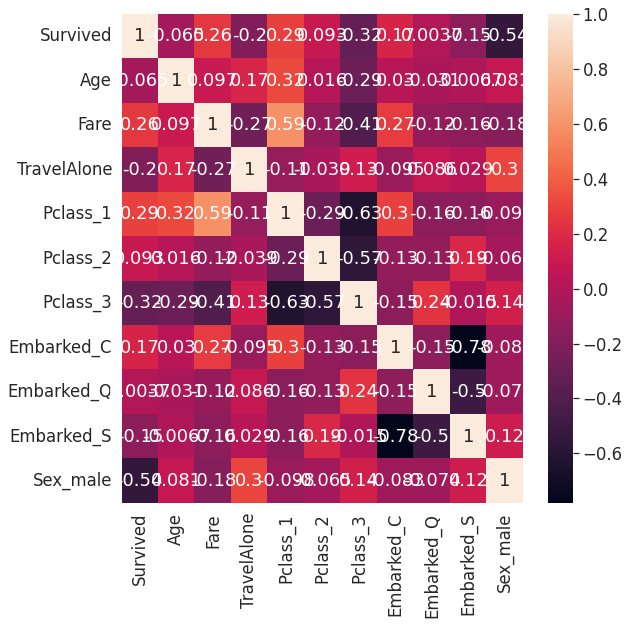

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(titanic1.corr(), annot=True)

In [ ]:
titanic1.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [ ]:
xx = titanic1.drop('Survived', axis=1)
YY = titanic1.iloc[:,:1]
display(xx)
display(YY)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,22.0,7.2500,0,0,0,1,0,0,1,1
1,38.0,71.2833,0,1,0,0,1,0,0,0
2,26.0,7.9250,1,0,0,1,0,0,1,0
3,35.0,53.1000,0,1,0,0,0,0,1,0
4,35.0,8.0500,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,1,0,0,0,1,1
887,19.0,30.0000,1,1,0,0,0,0,1,0
888,28.0,23.4500,0,0,0,1,0,0,1,0
889,26.0,30.0000,1,1,0,0,1,0,0,1


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
xx_train, xx_test, YY_train, YY_test = train_test_split(xx, YY, test_size=0.3, random_state=0)

In [ ]:
print("Train Data: ",xx_train.shape, YY_train.shape)
print("Test Data: ",xx_test.shape, YY_test.shape)

Train Data:  (623, 10) (623, 1)
Test Data:  (268, 10) (268, 1)


**Logistic Model**

In [ ]:
lgr = LogisticRegression()
lgr.fit(xx_train, YY_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
YY_predlgr = lgr.predict(xx_test)
cm9 = confusion_matrix(YY_test, YY_predlgr)
accuracy_score(YY_test, YY_predlgr)

0.8022388059701493

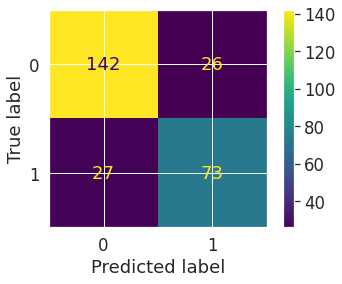

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm9)
cm_display.plot()
plt.show()